In [1]:
from agent.agent import Agent
from agent.methods import get_state, training_evaluate, plot
from environment.env import Environment
import random
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import math
import os
from keras.models import load_model

dataset = pd.read_pickle(r'data\dqn3_1.pkl')
dataset = dataset[['sigmoid2_1','sigmoid2_2','sigmoid2_3','sigmoid2_4', 'sigmoid2_5','sigmoid2_6', 'sigmoid2_7','sigmoid2_8','sigmoid2_9','sigmoid2_10','Adj Open','Adj Close']]
train_data = dataset.loc['2018'].reset_index()
test_data = dataset.loc['2019'].reset_index()

state_size = len(train_data.columns) -3 +1 +2 #add one state hold, current profit rate, hold time,
state_size = (state_size,)
buffer_size = 40000

agent = Agent(buffer_size, state_size, )

env = Environment(train_data)

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [2]:
agent.load('buffer_size 40000 2')

C:\Users\user\Anaconda3\envs\dqn\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
epsilon = 0.5
epsilon_min = 0.01
epsilon_decay = 0.995

batch_size = 64

agent.n_iter = 1
agent.gamma = 0.95
agent.learning_rate =0.0001
history_test = {}

for i in tqdm_notebook(range(200)):
    
    train_profit, done = 0, False
    
    state = env.reset()
    
   
    while not done:

        # select an action
        action = agent.act(state, epsilon,)
        next_state, reward, done, = env.step(action)
        train_profit += reward

        agent.remember_sumtree(state, action, reward, next_state, done) 
        agent.target_model_update(done, tau =0.1, type='transfer')
        epsilon = agent.epsilon_decay(epsilon, epsilon_min, epsilon_decay)   

        if agent.buffer.buffer.total() // batch_size > 0 :
            loss = agent.train_experience_replay_sumtree(batch_size)         
        
        state = next_state
                
    test_profit, history_test[i] = training_evaluate(agent, env,)    
        
    print('turn:%0.0f  train:%0.4f  test:%0.4f' % (i, math.exp(train_profit), math.exp(test_profit)))

turn:0  train:0.9055  test:1.2040
turn:1  train:1.1498  test:1.2173
turn:2  train:1.1226  test:1.1751
turn:3  train:1.1491  test:1.2135
turn:4  train:1.1463  test:1.2258
turn:5  train:1.1576  test:1.2731
turn:6  train:1.2073  test:1.2585
turn:7  train:1.1488  test:0.8438
turn:8  train:1.2648  test:1.2200
turn:9  train:1.2077  test:1.2563
turn:10  train:1.2108  test:1.2444
turn:11  train:1.2400  test:1.2698
turn:12  train:1.2108  test:1.2590
turn:13  train:1.1957  test:1.2435
turn:14  train:0.9945  test:1.2582
turn:15  train:1.2400  test:1.2411
turn:16  train:1.0122  test:1.2698
turn:17  train:1.2280  test:1.2640
turn:18  train:1.1985  test:1.2592
turn:19  train:1.2231  test:1.2311
turn:20  train:1.1763  test:1.3071
turn:21  train:1.2141  test:1.2718
turn:22  train:1.1621  test:1.2576
turn:23  train:1.2276  test:1.3069
turn:24  train:1.0556  test:1.2514
turn:25  train:1.2470  test:1.2575
turn:26  train:1.2775  test:1.2382
turn:27  train:1.2362  test:1.2702
turn:28  train:1.2477  test:1.

C:\Users\user\python\Dueling DQN\3 Act\agent\methods.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  result['hold'] = pd.Series(history[episode], data.index)


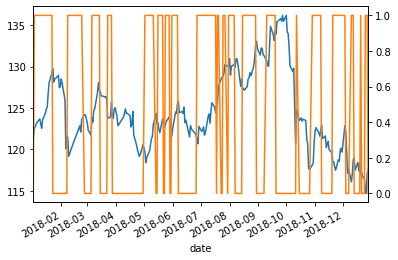

In [7]:
episode = 199
result = plot(train_data, history_test, episode)